In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Classification of TP/FP in XenomatiX validation dataset

In [2]:
df_cars = pd.read_csv(r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\val\cars.csv')
df_pedestrian = pd.read_csv(r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\val\pedestrian.csv')

In [8]:
df_bicycle = pd.read_csv(r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\val\bicycle.csv')
df_motorcycle = pd.read_csv(r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\val\motorcycle.csv')
df_truck = pd.read_csv(r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\val\truck.csv')
df_bus = pd.read_csv(r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\val\bus.csv')

In [3]:
print ("Total number of rows in dataset = {}".format(df_cars.shape[0]))

Total number of rows in dataset = 5670


In [4]:
df_cars_TP = df_cars[df_cars.Label!='FP']
# df_cars_TP = df_cars[:400]
df_cars_FP = df_cars[df_cars.Label!='TP']
# df_cars = pd.concat([df_cars_TP,df_cars_FP])
len(df_cars_FP),len(df_cars_TP)

(380, 5290)

In [24]:
# Split df_cars into x and Y 
target_col = "Label"
frame = "Frame Name"

# X = df_cars[:]
X = df_bus[:]

X = X.drop(["Frame Name"],axis=1)
X = X.drop(["2D bbox"],axis=1)
X = X.drop(["3D bbox"],axis=1)
X = X.drop(['Intensity'],axis=1)
X = X.drop(['3D height'],axis=1)
# X['Intensity'] = X['Intensity']/10000
#to plot with Label
X_plot = X[:]
X = X.drop([target_col],axis=1)

# y = df_cars.loc[:, target_col]
y = df_bus.loc[:, target_col]

In [25]:
#Random forest
RF = RandomForestClassifier(max_depth=14, n_jobs = 6,random_state=0, max_features=3)
for iter in range(50):    
    RF.fit(X, y)

In [6]:
# Multiple algorithms

# SGD
sgd = SGDClassifier(loss="log", penalty="l2", max_iter=500)

#SVC
svc = SVC(kernel='rbf',verbose=2)

#knn
knn = KNeighborsClassifier(n_neighbors=5)

#Random forest
RF = RandomForestClassifier(max_depth=10, random_state=0, max_features=2)

In [7]:
#Iterating the fitness
for iter in range(50):    
    sgd.fit(X, y)

In [8]:
for iter in range(50):    
    svc.fit(X,y)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [9]:
for iter in range(50):    
    knn.fit(X, y)

In [10]:
for iter in range(50):    
    RF.fit(X, y)

In [86]:
# Normalization function
# def normalize(dataset,factor):
#     dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))*factor
#     return dataNorm

In [29]:
# x_normal = normalize(X,10)
# X_plot = pd.DataFrame(x_normal,columns=['3D distance','2D box area','number of points','Intensity','3D height'])
# X_plot['Label'] = y
X_plot

,3D distance,2D box area,Non ground points,number of points,Intensity,3D height,Label
0,66.83051,7500.00000,36,39,1012.732100,3805.38,TP
1,104.66215,1950.00000,2,3,16434.553600,943.48,TP
2,112.88428,1209.00000,4,4,472.511200,3953.12,TP
3,65.42944,8160.00000,42,46,658.842550,2355.96,TP
4,104.73234,1540.00000,3,3,6046.891200,2159.05,TP
...,...,...,...,...,...,...,...
5665,67.40505,7506.20184,25,27,498.809900,1999.51,FP
5666,68.76473,14352.00000,58,77,72.312919,2343.07,TP
5667,72.76450,3968.00000,8,9,121.058888,1749.31,TP
5668,113.75947,2209.00000,4,6,365.008975,1379.67,TP


## Data visualization

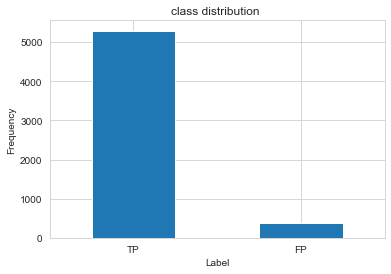

In [9]:
#plot the dataset frequency
labels = ['TP', 'FP']
classes = pd.value_counts(X_plot['Label'],sort = True)
classes.plot(kind = 'bar', rot = 0)
plt.title("class distribution ")
plt.xticks(range(2), labels )
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()

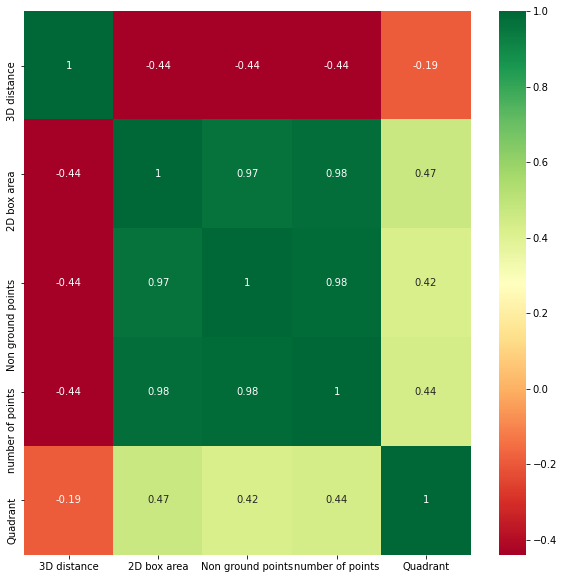

In [36]:
#Correlation matrix
# to check how two fields depend on each other
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

C:\Users\nisha\Anaconda3\envs\pytorch\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


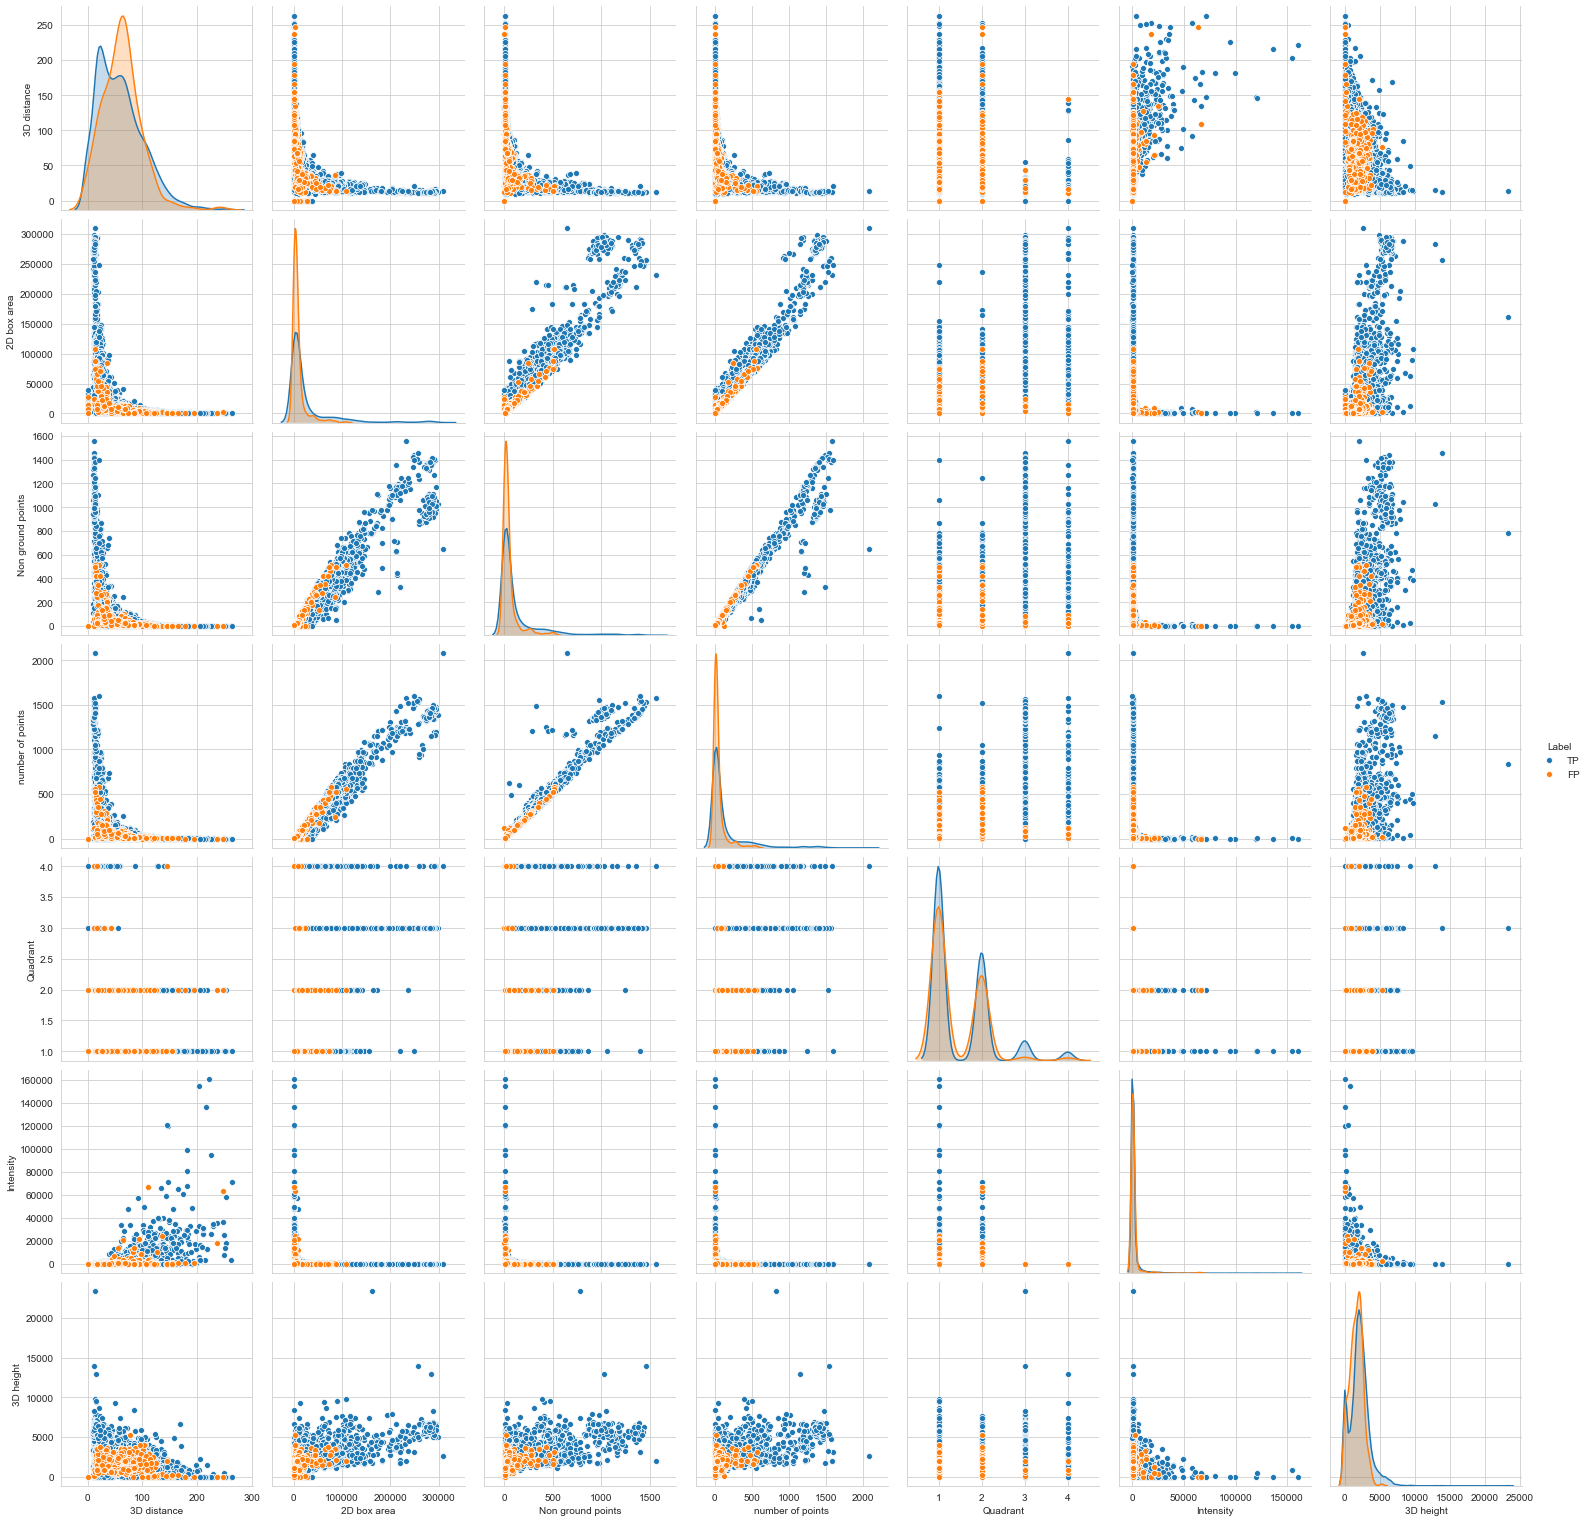

In [15]:
sns.set_style("whitegrid")
sns.pairplot(X_plot,hue='Label',size=3)

## Preprocessing

In [ ]:
# Normalization
# Standardization
# Data resampling
# k-fold cross validation

### Splitting the Data in Test and Train

In [7]:
# Splitting in training and test data set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 40)

In [30]:
# Removing Frame name - not a good parameter to train with
#will add later

# X_FrameName = X_test['Frame Name']
# X_train = X_train.drop(['Frame Name'],axis=1)
# X_test = X_test.drop(['Frame Name'],axis=1)

sgd = SGDClassifier(loss="log", penalty="l2", max_iter=500)

sgd.fit(X, y)
# predict = sgd.predict(X)

# print(accuracy_score(y_test,predict))    
#     print(confusion_matrix(y_test,predict))
# print(classification_report(y_test,predict))

SGDClassifier(loss='log', max_iter=500)

### K-fold cross validation 

In [13]:
kf = KFold(n_splits=5,shuffle=True)
sgd = SGDClassifier(max_iter=500)

In [ ]:
scores = []
for i in range(6):
    result = next(kf.split(X), None)    
    X_train = X.iloc[result[0]]
    X_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    
#     X_train = X_train.drop(['Frame Name'],axis=1)
#     X_test = X_test.drop(['Frame Name'],axis=1)
        
#     model = svc.predict(X_test) 
    sgd.fit(X_train, y_train)
    predict = sgd.predict(X_test)
    
    print(i,accuracy_score(y_test,predict))    
#     print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict))
    

## Get train dataset
### Make prediction on train dataset and save to excel sheet

In [6]:
df_cars_train = pd.read_csv(r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\train\cars.csv')
df_pedestrian_train = pd.read_csv(r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\train\pedestrian.csv')

In [11]:
df_bicycle_train = pd.read_csv(r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\train\bicycle.csv')
df_motorcycle_train = pd.read_csv(r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\train\motorcycle.csv')
df_truck_train = pd.read_csv(r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\train\truck.csv')
df_bus_train = pd.read_csv(r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\train\bus.csv')

In [26]:
# train = df_cars_train.drop(['Frame Name'],axis=1)
train = df_bus_train.drop(['Frame Name'],axis=1)
train = train.drop(['2D bbox'],axis=1)
train = train.drop(['3D bbox'],axis=1)
train = train.drop(['Label'],axis=1)
train = train.drop(['Intensity'],axis=1)
train = train.drop(['3D height'],axis=1)
# train['Intensity'] = train['Intensity']/10000

In [44]:
predict = sgd.predict(train)
prediction_train = df_cars_train[:]
prediction_train["Label"] = np.array(predict)

In [45]:
# Save the predicitons to excel file
prediction_train.to_csv(r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\train\cars_prediction.csv', index = False, header=True)

In [11]:
#  To check rows with NaN value
is_NaN = train.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = train[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [3D distance, 2D box area, Non ground points, number of points, Intensity, 3D height]
Index: []


### Saving multiple predictions of various models at the same time

In [13]:
#sgd
predict_sgd = sgd.predict(train)
prediction_train_sgd = df_cars_train[:]
prediction_train_sgd["Label"] = np.array(predict_sgd)
prediction_train_sgd.to_csv(r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\train\cars_sgd.csv', index = False, header=True)


#svc
predict_svc = svc.predict(train)
prediction_train_svc = df_cars_train[:]
prediction_train_svc["Label"] = np.array(predict_svc)
prediction_train_svc.to_csv(r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\train\cars_svc.csv', index = False, header=True)

#RF
predict_RF = RF.predict(train)
prediction_train_RF = df_cars_train[:]
prediction_train_RF["Label"] = np.array(predict_RF)
prediction_train_RF.to_csv(r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\train\cars_RF.csv', index = False, header=True)

#knn
predict_knn = knn.predict(train)
prediction_train_knn = df_cars_train[:]
prediction_train_knn["Label"] = np.array(predict_knn)
prediction_train_knn.to_csv(r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\train\cars_knn.csv', index = False, header=True)


In [10]:
#RF - Cars
predict_RF = RF.predict(train)
prediction_train_RF = df_cars_train[:]
prediction_train_RF["Label"] = np.array(predict_RF)
prediction_train_RF.to_csv(r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\train\cars_RF.csv', index = False, header=True)

In [15]:
#RF - Pedestrian
predict_RF = RF.predict(train)
prediction_train_RF = df_pedestrian_train[:]
prediction_train_RF["Label"] = np.array(predict_RF)
prediction_train_RF.to_csv(r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\train\pedestrian_RF.csv', index = False, header=True)

In [27]:
#RF - Pedestrian
predict_RF = RF.predict(train)
prediction_train_RF = df_bus_train[:]
prediction_train_RF["Label"] = np.array(predict_RF)
prediction_train_RF.to_csv(r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\train\bus_RF.csv', index = False, header=True)